In [53]:
#подключаем библиотеки
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

In [54]:
#чтобы не срабатывали предупреждения
import warnings
warnings.filterwarnings("ignore")

In [55]:
#загрузим стоп-слова
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords.words('russian')[:10]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['и', 'в', 'во', 'не', 'что', 'он', 'на', 'я', 'с', 'со']

In [56]:
#скачаем маски изображений для заполнения словами
import requests
files_ls = {'leaf1' : 'https://i.pinimg.com/originals/d8/10/53/d81053556e5055890498aaff12b7875e.png',
            'leaf2' : 'https://kartinkin.net/uploads/posts/2022-07/1657674309_2-kartinkin-net-p-listochki-klena-kartinki-2.png',
            'leaf3' : 'https://kartinkin.net/uploads/posts/2022-03/1646993138_8-kartinkin-net-p-kartinki-listikov-9.png'}

for key, img_url in files_ls.items():
  img_data = requests.get(img_url).content
  with open(key+'.png', 'wb') as handler:
    handler.write(img_data)

In [57]:
#  Введем текст:
text = '''
Реальный опыт, стаж
Хорошая жизнь, успех
Знания
Много, реальная, задача, разные сферы
Уметь, развиваться, большие данные, применять
Практика, знание, должность, компетентность, работа
буст, польза, практика, знать, уметь
Понимать, делать, разбираться, навыки, работа
Будущее, сегодня, трансформация, новая эпоха
Знания, опыт, навыки,
Основы подготовки датасета в конкретной предметной области
Рассказать, показать, стажировать, трудоустроить, искусственный интеллект
Знать,уметь,использовать,применять,достигать
Мне нужно свободное время хотя бы по вечерам. А появится оно только после 18 февраля. Тогда вечернее и выходные на любом проекте в качестве инженера данных
реальная практика
Информативность, практика, наглядность, актуальность
трудоустройство, практика, навыки, общение, развитие
Практика, нейросети, анализ, трудоустройство
Опыт, навыки, работа, обучение, оффер.
Научиться, попрактиковаться, овладеть, данные, методы
ИИ, знать, уметь, практиковаться, научиться
практика, опыт, связи, задачи, работа
Связи, практика, проект, деньги, знать
Изучить, использовать, улучшить, искусственный интеллект
Аналитика, искусственный интеллект, удалёнка, оплата, машинное обучение
Уметь применить полученные знания на практике
Практика, опыт, навык, искусственный интеллект
Получить практические навыки владения инструментами в области искусственного интелекта
потренироваться, овладеть, новый навык
Работа, увлеченность, занятость, польза, прогресс
Опыт, навыки, коммуникации, обратная связь
Знания, навыки, связи, развитие, нейросеть
Практика, задачи, искусственный интеллект, анализ данных
Попробовать, научиться, познакомиться, владеть, чувствовать
Направление, знание, практика, прорыв,  польза
Уметь, применять полученные знания
Практика, знания, опыт, аналитика, актуальность
Пока не могу сформулировать, недостаточно данных
Нейроны уметь владеть алгоритмы знать
Навыки Опыт Понимание Уверенность Рост
Искусственный интеллект, знания, умения, интерес, анализ
Структурировать полученные знания
Связи, знания, искусственный интеллект, робот
Продакшн модели
Знания, навыки, опыт, работа, польза
интерес, знание, умение, работа, общение
Искусственный интеллект, анализ данных, нейронные сети, умный дом, программа
Владеть навыки построение модели эффективность
Познавательно, полезно, прорыв
Учиться, новые знания, практический опыт
Работать
Владеть навыками по машинному обучению
Видеть применение практика перспективы
Знания, связи, повышение квалификации
Получить навыки и умения, которые можно получить только на стажировке
Успех, зарплата, мерч, суперкомпьютер, данные, праздник
'''
#преобразуем в нижний регистр и избавимся от стоп-слов
text = text.lower()
txt = []
for w in text.split():
  if w in stopwords.words('russian'):
    continue
  txt.append(w)
txt = ' '.join(txt)
print(txt)

реальный опыт, стаж хорошая жизнь, успех знания много, реальная, задача, разные сферы уметь, развиваться, большие данные, применять практика, знание, должность, компетентность, работа буст, польза, практика, знать, уметь понимать, делать, разбираться, навыки, работа будущее, сегодня, трансформация, новая эпоха знания, опыт, навыки, основы подготовки датасета конкретной предметной области рассказать, показать, стажировать, трудоустроить, искусственный интеллект знать,уметь,использовать,применять,достигать нужно свободное время хотя вечерам. появится оно 18 февраля. вечернее выходные любом проекте качестве инженера данных реальная практика информативность, практика, наглядность, актуальность трудоустройство, практика, навыки, общение, развитие практика, нейросети, анализ, трудоустройство опыт, навыки, работа, обучение, оффер. научиться, попрактиковаться, овладеть, данные, методы ии, знать, уметь, практиковаться, научиться практика, опыт, связи, задачи, работа связи, практика, проект, ден

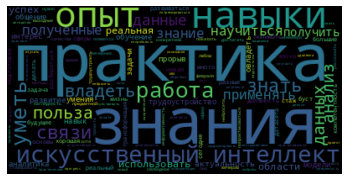

In [58]:
# Создадим облако слов
wordcloud = WordCloud().generate(txt)

# Выведем его на экран
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [59]:
#преобразуем все маски изображений в двумерные массивы numpy
cloud_masks = []
for mask_img in files_ls.keys():
    cloud_mask = np.array(Image.open(mask_img+'.png'))
    if len(cloud_mask.shape) == 3:
      cloud_mask = cloud_mask[:,:,0]
    cloud_masks.append(cloud_mask)

In [60]:
#создадим функцию для инвертирования объекта в контейнер для облака слов
def transform_format(val):
    if val == 0:
        return 255
    else:
        return val

In [61]:
#выполним преобразование всех масок в соответствии с описанной выше функцией
transformed_cloud_masks = []
for cm in cloud_masks:
  transformed_cloud_mask = np.ndarray((cm.shape[0],cm.shape[1]), np.int32)
  for i in range(len(cm)):
    transformed_cloud_mask[i] = list(map(transform_format, cm[i]))
  transformed_cloud_masks.append(transformed_cloud_mask)

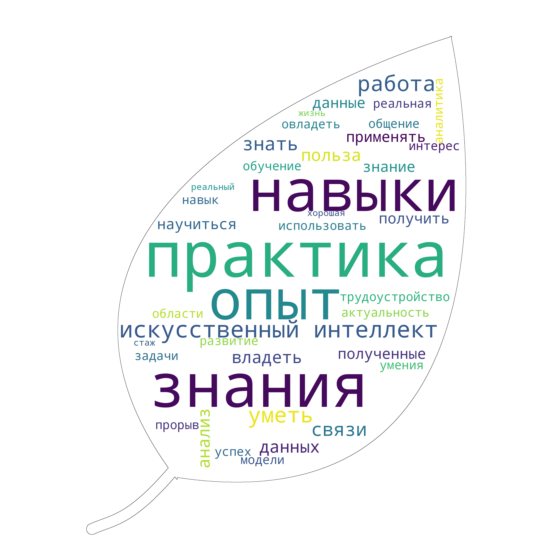

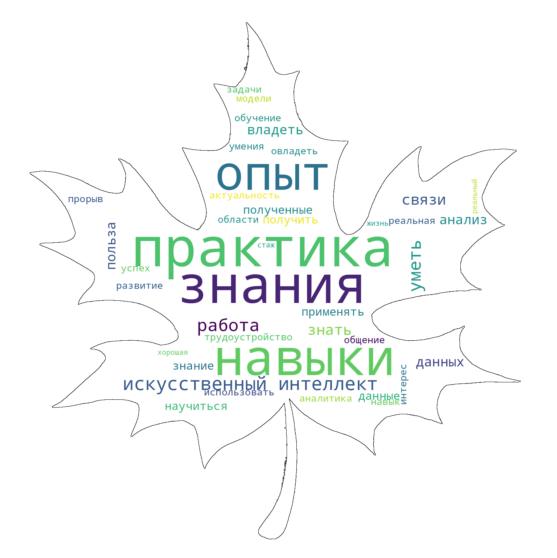

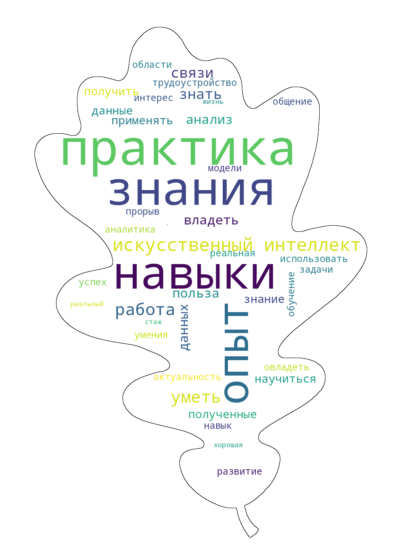

In [62]:
#обработаем текст и выведем его в соответствии с каждой маской
i = 1
for tcm in transformed_cloud_masks:
  wc = WordCloud(max_words=40, mask=tcm, contour_width=0.5, background_color="white", contour_color='black')
  # генерируем облако слов
  wc.generate(txt)
  # сохраняем его в файл
  wc.to_file("word-cloud"+str(i)+".jpg")
  # визуализация
  plt.figure(figsize=[20,10])
  plt.imshow(wc, interpolation='bilinear')
  plt.axis("off")
  i = i + 1
plt.show()